In [26]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


#loading the CSV file containinge data

Inndata = pd.read_csv("TSLA.csv")

In [27]:
Inndata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


<Axes: xlabel='Date', ylabel='Close'>

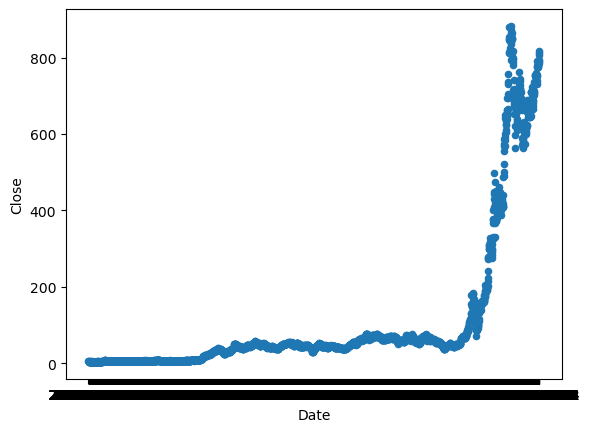

In [28]:
Inndata.plot.scatter(x = "Date", y ="Close")

In [29]:

Inndata["Date"] = pd.to_datetime(Inndata["Date"])

#Sorting data based on date, and adjusting "Date" as an index 

Inndata = Inndata.sort_values(by="Date")
Inndata.set_index("Date", inplace= True)


X = Inndata.index.to_julian_date().values.reshape(-1,1)
y = Inndata["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

modell = LinearRegression()
modell.fit(X_train, y_train)

y_predic = modell.predict(X_test)

# r_squared : represent goodness of fit to a regression model.Value between 0 and 1 where 1 is perfect fit.
r_squared = r2_score(y_test, y_predic)
# MeanAE : represents mean absolute error betweeen paired observations.
MeanAE = mean_absolute_error(y_test, y_predic)



print(f"R squared value Score: {r_squared} ")
print(f"Mean absolute error: {MeanAE}")

R squared value Score: 0.40033704101589385 
Mean absolute error: 101.54718245467143


In [38]:
# Specify the date you want to predict
specific_date = datetime.datetime(2010, 6, 29)

# Convert the specific date to a Julian date
specific_date_julian = specific_date.toordinal()

# Predict the stock price for the specific date
predicted_price = modell.predict([[specific_date_julian]])[0]

print(f"Predicted Price for {specific_date}: {predicted_price}")

Predicted Price for 2010-06-29 00:00:00: [-177077.4940042]
